/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


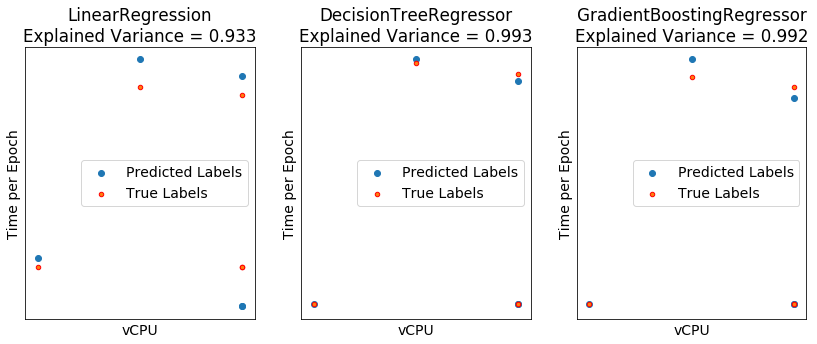

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_log_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR

np.random.seed(42)

from selection import evaluate, load_data

X_train, X_test, y_train, y_test = load_data()

plt.figure(figsize=(14, 5))

plt.rcParams.update({'font.size': 14})

models = [LinearRegression, DecisionTreeRegressor, GradientBoostingRegressor]
model_names = ['LinearRegression', 'DecisionTreeRegressor', 'GradientBoostingRegressor']

display_sample_idx = np.random.choice(len(y_test), 5)

for i, model_class in enumerate(models):
    ax = plt.subplot(1, len(models), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    model = model_class()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    explained_variance = explained_variance_score(y_test, y_predict)

    plt.scatter(X_test[:,1][display_sample_idx], model.predict(X_test[display_sample_idx]), label="Predicted Labels")
    plt.scatter(X_test[:,1][display_sample_idx], y_test[display_sample_idx], edgecolor='r', s=20, label="True Labels")

    plt.xlabel("vCPU")
    plt.ylabel("Time per Epoch")
    plt.legend(loc="best")
    plt.title("{}\nExplained Variance = {:.3f}".format(model_names[i], explained_variance))

plt.savefig("predicted_values.pdf")
plt.show()


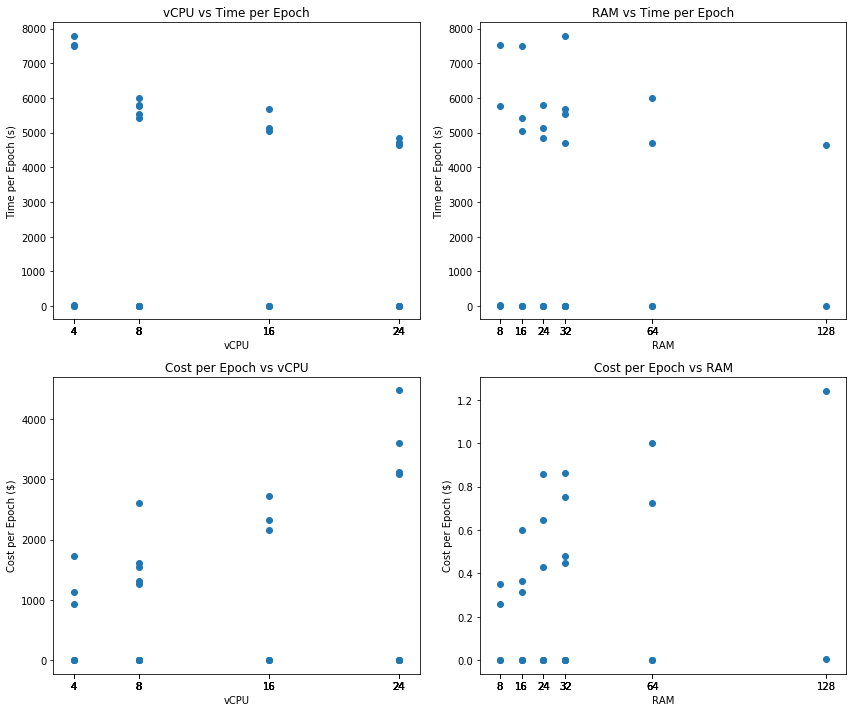

In [3]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
from selection import load_data_graph
X, y = load_data_graph()
plt.figure(1, figsize=(12, 10))

ax = plt.subplot(2, 2, 1)
plt.setp(ax, xticks=(), yticks=())
  
plt.xticks(X[:,1])
plt.yscale('linear')
plt.xlabel("vCPU")
plt.ylabel("Time per Epoch (s)")
plt.scatter(X[:,1], y, label="Samples")
plt.title("vCPU vs Time per Epoch")

ax = plt.subplot(2, 2, 2)
plt.setp(ax, xticks=(), yticks=())

plt.xticks(X[:,2])
plt.yscale('linear')
plt.xlabel("RAM")
plt.ylabel("Time per Epoch (s)")
plt.scatter(X[:,2], y, label="Samples")
plt.title("RAM vs Time per Epoch")

ax = plt.subplot(2, 2, 3)
plt.setp(ax, xticks=(), yticks=())

plt.xticks(X[:,1])
plt.yscale('linear')
plt.xlabel("vCPU")
plt.ylabel("Cost per Epoch ($)")
plt.scatter(X[:,1], y*X[:,-1], label="Samples")
plt.title("Cost per Epoch vs vCPU")

ax = plt.subplot(2, 2, 4)
plt.setp(ax, xticks=(), yticks=())

plt.xticks(X[:,2])
plt.yscale('linear')
plt.xlabel("RAM")
plt.ylabel("Cost per Epoch ($)")
plt.scatter(X[:,2], (y/3600)*X[:,-1], label="Samples")
plt.title("Cost per Epoch vs RAM")

plt.gca().yaxis.set_minor_formatter(NullFormatter())

plt.savefig("data_details.pdf")
plt.tight_layout()
plt.show()



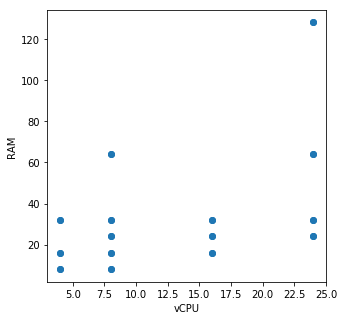

In [4]:
plt.figure(figsize=(5, 5))
plt.xlabel("vCPU")
plt.ylabel("RAM")
plt.scatter(X[:,1], X[:,2], label="Samples")
plt.savefig("collected_data.pdf")
plt.show()